## I. Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## II. Importing and understanding our dataset 

In [2]:
dataset = pd.read_csv("ps2_available_dataset.csv")

#### Verifying it as a 'dataframe' object in pandas

In [3]:
type(dataset)

pandas.core.frame.DataFrame

#### Shape of dataset

In [4]:
dataset.shape

(10000, 11)

#### Printing out a few columns for better visualization of data

In [5]:
dataset.head(5)

,treatment,age,blood_pressure,gender,blood_test,family_history,MeasureA,TestB,GeneA,GeneB,GeneC
0,1,74,94.113373,non-female,negative,False,-11.035690,-0.336843,double,1,0
1,1,56,83.337745,non-female,negative,False,-3.982345,-0.018734,none,1,1
2,0,37,81.759240,female,negative,False,6.205701,0.147933,double,1,1
3,1,54,88.549518,female,negative,False,-1.827613,-0.338373,none,1,1
4,0,73,82.171555,female,negative,NaN,-14.637389,-0.369325,none,1,1


#### Checking if any columns have null value

In [6]:
dataset.isnull().any()

treatment         False
age               False
blood_pressure    False
gender            False
blood_test        False
family_history     True
MeasureA          False
TestB             False
GeneA             False
GeneB             False
GeneC             False
dtype: bool

#### Looks like family_history has null values
## III. Data Preprocessing ####
#### Filling these values with the mode

In [7]:
dataset['family_history'] = dataset['family_history'].fillna(dataset['family_history'].mode()[0])
dataset

,treatment,age,blood_pressure,gender,blood_test,family_history,MeasureA,TestB,GeneA,GeneB,GeneC
0,1,74,94.113373,non-female,negative,False,-11.035690,-0.336843,double,1,0
1,1,56,83.337745,non-female,negative,False,-3.982345,-0.018734,none,1,1
2,0,37,81.759240,female,negative,False,6.205701,0.147933,double,1,1
3,1,54,88.549518,female,negative,False,-1.827613,-0.338373,none,1,1
4,0,73,82.171555,female,negative,False,-14.637389,-0.369325,none,1,1
...,...,...,...,...,...,...,...,...,...,...,...
9995,1,49,89.036800,non-female,negative,False,-1.384107,-0.333167,double,1,0
9996,0,64,90.848126,non-female,negative,False,-6.560963,-0.015892,double,1,0
9997,0,54,82.028043,female,negative,False,-3.192784,-0.317267,none,1,0
9998,1,54,82.246645,female,negative,False,-4.138708,-0.042504,double,1,1


#### Finding the number of categories in categorical variables

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
treatment         10000 non-null int64
age               10000 non-null int64
blood_pressure    10000 non-null float64
gender            10000 non-null object
blood_test        10000 non-null object
family_history    10000 non-null bool
MeasureA          10000 non-null float64
TestB             10000 non-null float64
GeneA             10000 non-null object
GeneB             10000 non-null int64
GeneC             10000 non-null int64
dtypes: bool(1), float64(3), int64(4), object(3)
memory usage: 791.1+ KB


0    6413
1    3587
Name: treatment, dtype: int64

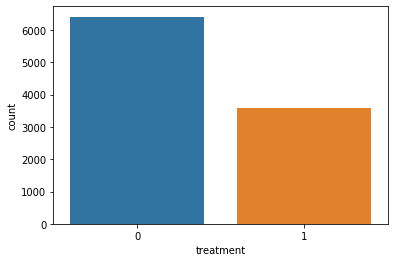

In [9]:
y = dataset["treatment"]

sns.countplot(y)

dataset["treatment"].value_counts()

In [10]:
dataset["gender"].value_counts()

female        6362
non-female    3638
Name: gender, dtype: int64

In [11]:
dataset["blood_test"].value_counts()

negative    9067
positive     933
Name: blood_test, dtype: int64

In [12]:
dataset["family_history"].value_counts()

False    9900
True      100
Name: family_history, dtype: int64

In [13]:
dataset["GeneA"].value_counts()

none      4482
double    3479
single    2039
Name: GeneA, dtype: int64

#### Performing one hot encoding

In [14]:
#dataset["gender"] = dataset["gender"].astype('category')
#dataset["gender"] = dataset["gender"].cat.codes
dataset1 = pd.concat([dataset,pd.get_dummies(dataset['gender'], prefix='Gender')],axis=1).drop(['gender'],axis=1)

In [15]:
dataset2 = pd.concat([dataset1,pd.get_dummies(dataset['blood_test'], prefix='Blood_test')],axis=1).drop(['blood_test'],axis=1)
dataset2

,treatment,age,blood_pressure,family_history,MeasureA,TestB,GeneA,GeneB,GeneC,Gender_female,Gender_non-female,Blood_test_negative,Blood_test_positive
0,1,74,94.113373,False,-11.035690,-0.336843,double,1,0,0,1,1,0
1,1,56,83.337745,False,-3.982345,-0.018734,none,1,1,0,1,1,0
2,0,37,81.759240,False,6.205701,0.147933,double,1,1,1,0,1,0
3,1,54,88.549518,False,-1.827613,-0.338373,none,1,1,1,0,1,0
4,0,73,82.171555,False,-14.637389,-0.369325,none,1,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,49,89.036800,False,-1.384107,-0.333167,double,1,0,0,1,1,0
9996,0,64,90.848126,False,-6.560963,-0.015892,double,1,0,0,1,1,0
9997,0,54,82.028043,False,-3.192784,-0.317267,none,1,0,1,0,1,0
9998,1,54,82.246645,False,-4.138708,-0.042504,double,1,1,1,0,1,0


In [16]:
dataset3 = pd.concat([dataset2,pd.get_dummies(dataset['family_history'], prefix='Family_History')],axis=1).drop(['family_history'],axis=1)
dataset3

,treatment,age,blood_pressure,MeasureA,TestB,GeneA,GeneB,GeneC,Gender_female,Gender_non-female,Blood_test_negative,Blood_test_positive,Family_History_False,Family_History_True
0,1,74,94.113373,-11.035690,-0.336843,double,1,0,0,1,1,0,1,0
1,1,56,83.337745,-3.982345,-0.018734,none,1,1,0,1,1,0,1,0
2,0,37,81.759240,6.205701,0.147933,double,1,1,1,0,1,0,1,0
3,1,54,88.549518,-1.827613,-0.338373,none,1,1,1,0,1,0,1,0
4,0,73,82.171555,-14.637389,-0.369325,none,1,1,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,49,89.036800,-1.384107,-0.333167,double,1,0,0,1,1,0,1,0
9996,0,64,90.848126,-6.560963,-0.015892,double,1,0,0,1,1,0,1,0
9997,0,54,82.028043,-3.192784,-0.317267,none,1,0,1,0,1,0,1,0
9998,1,54,82.246645,-4.138708,-0.042504,double,1,1,1,0,1,0,1,0


In [17]:
dataset4 = pd.concat([dataset3,pd.get_dummies(dataset['GeneA'], prefix='GeneA')],axis=1).drop(['GeneA'],axis=1)
dataset4

,treatment,age,blood_pressure,MeasureA,TestB,GeneB,GeneC,Gender_female,Gender_non-female,Blood_test_negative,Blood_test_positive,Family_History_False,Family_History_True,GeneA_double,GeneA_none,GeneA_single
0,1,74,94.113373,-11.035690,-0.336843,1,0,0,1,1,0,1,0,1,0,0
1,1,56,83.337745,-3.982345,-0.018734,1,1,0,1,1,0,1,0,0,1,0
2,0,37,81.759240,6.205701,0.147933,1,1,1,0,1,0,1,0,1,0,0
3,1,54,88.549518,-1.827613,-0.338373,1,1,1,0,1,0,1,0,0,1,0
4,0,73,82.171555,-14.637389,-0.369325,1,1,1,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,49,89.036800,-1.384107,-0.333167,1,0,0,1,1,0,1,0,1,0,0
9996,0,64,90.848126,-6.560963,-0.015892,1,0,0,1,1,0,1,0,1,0,0
9997,0,54,82.028043,-3.192784,-0.317267,1,0,1,0,1,0,1,0,0,1,0
9998,1,54,82.246645,-4.138708,-0.042504,1,1,1,0,1,0,1,0,1,0,0


#### Checking to see if all datatypes are numerical or category

In [18]:
dataset4.dtypes

treatment                 int64
age                       int64
blood_pressure          float64
MeasureA                float64
TestB                   float64
GeneB                     int64
GeneC                     int64
Gender_female             uint8
Gender_non-female         uint8
Blood_test_negative       uint8
Blood_test_positive       uint8
Family_History_False      uint8
Family_History_True       uint8
GeneA_double              uint8
GeneA_none                uint8
GeneA_single              uint8
dtype: object

In [19]:
dataset4.head()

,treatment,age,blood_pressure,MeasureA,TestB,GeneB,GeneC,Gender_female,Gender_non-female,Blood_test_negative,Blood_test_positive,Family_History_False,Family_History_True,GeneA_double,GeneA_none,GeneA_single
0,1,74,94.113373,-11.035690,-0.336843,1,0,0,1,1,0,1,0,1,0,0
1,1,56,83.337745,-3.982345,-0.018734,1,1,0,1,1,0,1,0,0,1,0
2,0,37,81.759240,6.205701,0.147933,1,1,1,0,1,0,1,0,1,0,0
3,1,54,88.549518,-1.827613,-0.338373,1,1,1,0,1,0,1,0,0,1,0
4,0,73,82.171555,-14.637389,-0.369325,1,1,1,0,1,0,1,0,0,1,0


#### Analysing the 'target' variable

In [20]:
dataset4["treatment"].describe()

count    10000.000000
mean         0.358700
std          0.479643
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: treatment, dtype: float64

## Exploratory Data Analysis (EDA)

#### Plotting a boxplot to identify outliers 

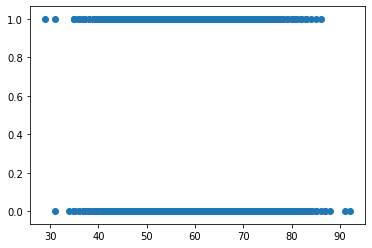

In [21]:
plt.scatter(dataset4['age'],dataset4['treatment'])

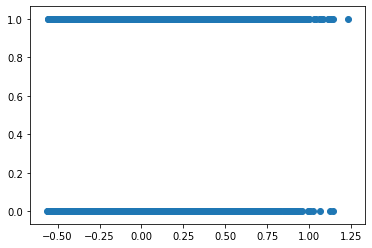

In [22]:
plt.scatter(dataset4['TestB'],dataset4['treatment'])

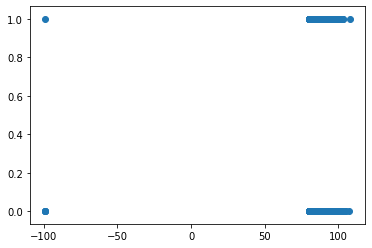

In [23]:
plt.scatter(dataset4['blood_pressure'],dataset4['treatment'])

In [24]:
dataset4= dataset4[dataset4['blood_pressure']>0]

In [25]:
dataset4= dataset4[dataset4['age']>32]
dataset4= dataset4[dataset4['age']<90]

In [26]:
dataset4= dataset4[dataset4['TestB']<1.23]

In [27]:
dataset4.shape

(9989, 16)

#### Finding correlation between other 'predictors' and target variable

In [28]:
print(dataset4.corr()["treatment"].abs().sort_values(ascending=False))

treatment               1.000000
Gender_non-female       0.330215
Gender_female           0.330215
age                     0.148342
MeasureA                0.144887
Family_History_True     0.134460
Family_History_False    0.134460
blood_pressure          0.096325
TestB                   0.059766
Blood_test_positive     0.053323
Blood_test_negative     0.053323
GeneC                   0.044434
GeneB                   0.027173
GeneA_none              0.001896
GeneA_single            0.001398
GeneA_double            0.000797
Name: treatment, dtype: float64


#### Plotting a heatmap in order to understand correlation between variables better 

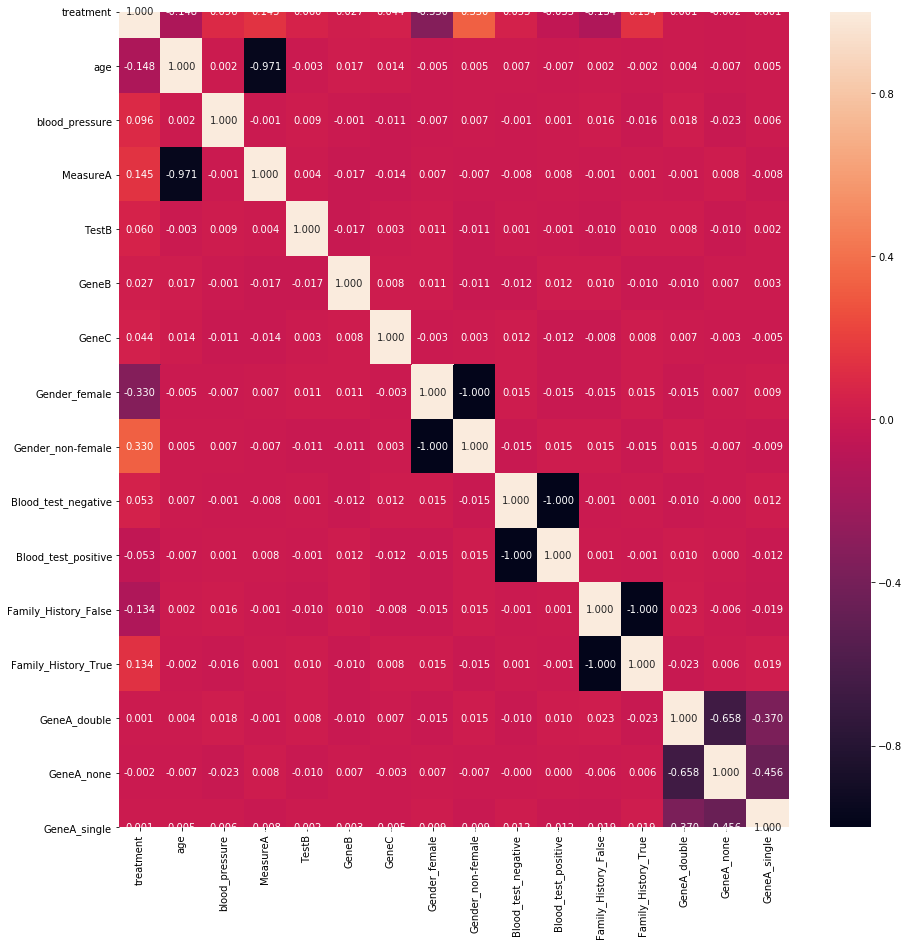

In [29]:
corrmat = dataset4.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(15,15))
g=sns.heatmap(dataset4[top_corr_features].corr(), annot = True, fmt= '.3f') #use matplotlib 3.1.2 or higher


In [30]:
dataset4.corr()

,treatment,age,blood_pressure,MeasureA,TestB,GeneB,GeneC,Gender_female,Gender_non-female,Blood_test_negative,Blood_test_positive,Family_History_False,Family_History_True,GeneA_double,GeneA_none,GeneA_single
treatment,1.000000,-0.148342,0.096325,0.144887,0.059766,0.027173,0.044434,-0.330215,0.330215,0.053323,-0.053323,-0.134460,0.134460,0.000797,-0.001896,0.001398
age,-0.148342,1.000000,0.002214,-0.970605,-0.003250,0.017322,0.014372,-0.004621,0.004621,0.006782,-0.006782,0.002061,-0.002061,0.003721,-0.007263,0.004565
blood_pressure,0.096325,0.002214,1.000000,-0.001424,0.009188,-0.001465,-0.010596,-0.006517,0.006517,-0.000841,0.000841,0.015513,-0.015513,0.018181,-0.022557,0.006347
MeasureA,0.144887,-0.970605,-0.001424,1.000000,0.003938,-0.017271,-0.014164,0.007406,-0.007406,-0.007610,0.007610,-0.001160,0.001160,-0.001471,0.008031,-0.008175
TestB,0.059766,-0.003250,0.009188,0.003938,1.000000,-0.017004,0.003379,0.010961,-0.010961,0.000960,-0.000960,-0.010484,0.010484,0.008381,-0.009942,0.002363
GeneB,0.027173,0.017322,-0.001465,-0.017271,-0.017004,1.000000,0.008079,0.011171,-0.011171,-0.011809,0.011809,0.009740,-0.009740,-0.009755,0.006570,0.003425
GeneC,0.044434,0.014372,-0.010596,-0.014164,0.003379,0.008079,1.000000,-0.003044,0.003044,0.011747,-0.011747,-0.008004,0.008004,0.007283,-0.002677,-0.005308
Gender_female,-0.330215,-0.004621,-0.006517,0.007406,0.010961,0.011171,-0.003044,1.000000,-1.000000,0.014912,-0.014912,-0.015446,0.015446,-0.014728,0.006618,0.009246
Gender_non-female,0.330215,0.004621,0.006517,-0.007406,-0.010961,-0.011171,0.003044,-1.000000,1.000000,-0.014912,0.014912,0.015446,-0.015446,0.014728,-0.006618,-0.009246
Blood_test_negative,0.053323,0.006782,-0.000841,-0.007610,0.000960,-0.011809,0.011747,0.014912,-0.014912,1.000000,-1.000000,-0.001142,0.001142,-0.009817,-0.000261,0.011931


#### Dropping the columns(features) that are not very useful in our calculations

In [31]:
dataset4.drop(['MeasureA', 'GeneA_double', 'GeneA_none', 'GeneA_single'], axis='columns', inplace=True)

In [32]:
dataset4.head()

,treatment,age,blood_pressure,TestB,GeneB,GeneC,Gender_female,Gender_non-female,Blood_test_negative,Blood_test_positive,Family_History_False,Family_History_True
0,1,74,94.113373,-0.336843,1,0,0,1,1,0,1,0
1,1,56,83.337745,-0.018734,1,1,0,1,1,0,1,0
2,0,37,81.759240,0.147933,1,1,1,0,1,0,1,0
3,1,54,88.549518,-0.338373,1,1,1,0,1,0,1,0
4,0,73,82.171555,-0.369325,1,1,1,0,1,0,1,0


## IV. Train Test split

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale

#### Setting treatment as the dependent/target variable and the rest of the variables are predictors

In [34]:
predictors = dataset4.drop("treatment",axis=1)
target = dataset4["treatment"]

In [35]:
# scaling (the df is converted to a numpy array)
cols = predictors.columns
predictors = pd.DataFrame(scale(predictors))
predictors.columns = cols
predictors.columns

Index(['age', 'blood_pressure', 'TestB', 'GeneB', 'GeneC', 'Gender_female',
       'Gender_non-female', 'Blood_test_negative', 'Blood_test_positive',
       'Family_History_False', 'Family_History_True'],
      dtype='object')

In [51]:
X_train,X_test,y_train,y_test = train_test_split(predictors,target,train_size=0.80,test_size=0.20,random_state=0)

## V. Model Fitting

In [53]:

from math import sqrt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

### Logistic Regression

In [54]:
from sklearn.linear_model import LogisticRegression
#X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.3, random_state=0)

lr = LogisticRegression()

lr.fit(X_train,y_train)

Y_pred = lr.predict(X_test)

C:\Users\Srinivas Bhat\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [55]:
Y_pred.shape

(1998,)

In [56]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(lr.score(X_test, y_test)))


Accuracy of logistic regression classifier on test set: 0.73


In [57]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, Y_pred)
pd.DataFrame(confusion_matrix(y_test, Y_pred), columns=['Predicted 0', "Predicted 1"], index=['Actual 0', 'Actual 1'])

,Predicted 0,Predicted 1
Actual 0,1116,200
Actual 1,347,335


In [58]:
tn, fp, fn, tp = confusion_matrix(y_test, Y_pred).ravel()
print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')

True Positives: 335
False Positives: 200
True Negatives: 1116
False Negatives: 347


In [59]:
probas = lr.predict_proba(X_test)[:, 1]

In [60]:
def get_preds(threshold, probabilities):
    return [1 if prob > threshold else 0 for prob in probabilities]

In [61]:
roc_values = []
for thresh in np.linspace(0, 1, 100):
    preds = get_preds(thresh, probas)
    tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()
    tpr = tp/(tp+fn)
    fpr = fp/(fp+tn)
    roc_values.append([tpr, fpr])
tpr_values, fpr_values = zip(*roc_values)

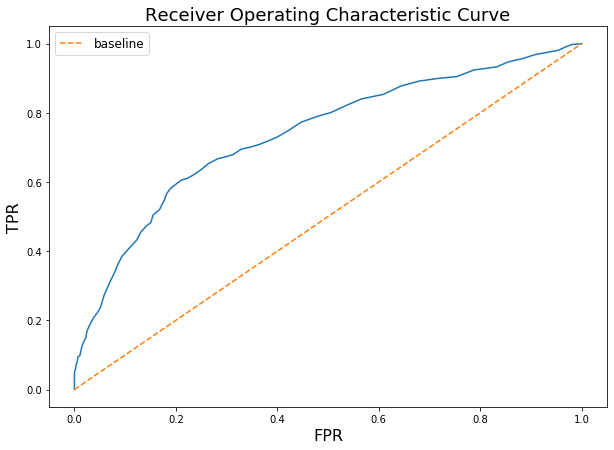

In [62]:
fig, ax = plt.subplots(figsize=(10,7))
ax.plot(fpr_values, tpr_values)
ax.plot(np.linspace(0, 1, 100),
         np.linspace(0, 1, 100),
         label='baseline',
         linestyle='--')
plt.title('Receiver Operating Characteristic Curve', fontsize=18)
plt.ylabel('TPR', fontsize=16)
plt.xlabel('FPR', fontsize=16)
plt.legend(fontsize=12);


In [63]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, probas )

0.7380235584593855

In [64]:
print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.76      0.85      0.80      1316
           1       0.63      0.49      0.55       682

    accuracy                           0.73      1998
   macro avg       0.69      0.67      0.68      1998
weighted avg       0.72      0.73      0.72      1998



In [65]:
from sklearn.linear_model import LogisticRegression
#X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.3, random_state=0)

lr_l1 = LogisticRegression(penalty='l1')

lr_l1.fit(X_train,y_train)

Y_pred_l1 = lr_l1.predict(X_test)

print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(lr_l1.score(X_test, y_test)))


Accuracy of logistic regression classifier on test set: 0.73


C:\Users\Srinivas Bhat\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [66]:
from sklearn.linear_model import LogisticRegression
#X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.3, random_state=0)

lr_en = LogisticRegression(penalty='elasticnet', solver = 'saga', l1_ratio= 0.1)

lr_en.fit(X_train,y_train)

Y_pred_en = lr_en.predict(X_test)

print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(lr_en.score(X_test, y_test)))


Accuracy of logistic regression classifier on test set: 0.73


#### Even with regularization, the models give same accuracy